# afternoon

In [9]:
from tqdm import tqdm


In [1]:
import json
data = []
with   open('WSJ_20170607_to_20170726_10AmTo4Pm.json', encoding="utf-8") as f:
  for line in f:
    data.append(json.loads(line))
texts = [e['content'] for e in data]

In [2]:
len(texts)

2062

In [2]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
import random
import csv
random.seed(555)
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

k = 5

vec = TfidfVectorizer(min_df=5, max_df=.4, stop_words="english")
features = vec.fit_transform(texts)
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
predictions = km.fit_predict(features)


In [19]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()

print("Top terms per cluster:")

for i in range(k):
    print("Cluster {}: ".format(i), end='')
    for ind in order_centroids[i, :10]:
        print("{} ".format(terms[ind]), end='')
    print()

Top terms per cluster:
Cluster 0: says ms people home city just york old police dr 
Cluster 1: china oil chinese prices production gold opec beijing crude barrels 
Cluster 2: trump eu president state government house senate russian russia tax 
Cluster 3: fed inflation bank bond rate ecb central rates policy yields 
Cluster 4: company billion sales million companies business market quarter shares investors 


In [35]:
# For 1 to 15 cluster centers
wss = []
for i in range(2, 10):
    print(i)
    km = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=5)
    km.fit(features)
    wss.append(km.inertia_)


2
3
4
5
6
7
8
9


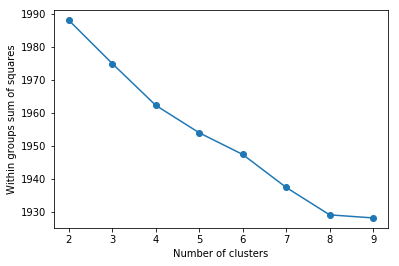

In [36]:
# Plot total within sum of squares vs. number of clusters
plt.plot(range(2, 10), wss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within groups sum of squares')
plt.show()



In [25]:

k = 8

vec = TfidfVectorizer(min_df=5, max_df=.4, stop_words="english")
features = vec.fit_transform(texts)
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
predictions = km.fit_predict(features)
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()

print("Top terms per cluster:")

for i in range(k):
    print("Cluster {}: ".format(i), end='')
    for ind in order_centroids[i, :10]:
        print("{} ".format(terms[ind]), end='')
    print()

Top terms per cluster:
Cluster 0: company sales billion million amazon google revenue companies shares business 
Cluster 1: oil qatar saudi arabia opec crude barrels production gas prices 
Cluster 2: trump russian president russia house white comey administration sanctions investigation 
Cluster 3: health care senate tax republicans medicaid aca insurance gop hospital 
Cluster 4: china billion bank chinese banks investors debt financial companies market 
Cluster 5: eu state government brexit european party islamic minister court police 
Cluster 6: fed inflation bank bond ecb rate central rates policy yields 
Cluster 7: says ms people home city just york work old million 


In [27]:
output = zip(predictions,texts)
with open("clusteroutput.csv", mode="w") as f:
    writer=csv.writer(f)
    writer.writerows(output)

In [32]:
import pandas as pd
df = pd.read_csv("clusteroutput.csv", header=None)
df.columns = ["cluster", "text"]
df.head()

,cluster,text
0,0,"Uber Technologies Inc., trying to reshape its ..."
1,5,BERLIN—German Chancellor Angela Merkel ...
2,3,WASHINGTON—Democrats have begun escalating the...
3,7,Rapper Lil Wayne has sold his high...
4,7,Coffee prices fell to a one-year low Tuesday a...


In [33]:
df.cluster.value_counts()

7    777
4    329
0    316
5    217
2    141
6    122
3     81
1     79
Name: cluster, dtype: int64

In [ ]:
km.

In [58]:
km.cluster_centers_[0]

array([0.02166551, 0.        , 0.        , ..., 0.0012837 , 0.        ,
       0.        ])

In [59]:
import numpy as np

In [46]:
dists_to_cl0 = []
for i in range(len(texts)):
    dists_to_cl0.append(np.linalg.norm(km.cluster_centers_[0] - features[i]))

In [51]:
d = pd.DataFrame({"texts": texts, "dist": dists_to_cl0})
d

,dist,texts
0,1.007984,"Uber Technologies Inc., trying to reshape its ..."
1,1.001290,BERLIN—German Chancellor Angela Merkel ...
2,0.992497,WASHINGTON—Democrats have begun escalating the...
3,0.969718,Rapper Lil Wayne has sold his high...
4,1.005473,Coffee prices fell to a one-year low Tuesday a...
5,1.006259,"Copper prices fell to a two-week low Tuesday, ..."
6,0.993699,Amazon.com Inc. AMZN 0.24% is giv...
7,1.000473,Nestlé SA NSRGY 0.52% has bought ...
8,1.004762,"BAGHDAD—Iraqi forces are using small, off-the-..."
9,1.005151,One of the many ironies of the Theresa M...


In [56]:
d.sort_values(by="dist")

,dist,texts
596,0.214066,
835,0.939700,Roughly three million potential first-time hom...
245,0.942194,Brendon Craigie was searching for a city somew...
246,0.943433,James Bond meets Midcentury Modern. Italianate...
1017,0.951141,The controversy over Obamacare and now the rau...
189,0.951417,The first time Angelo Smyrnios pulled up in fr...
322,0.951677,"There’s no grocery store, hospital or police s..."
1075,0.951730,Nine years after the last condominium craze fa...
1871,0.952109,After superstorm Sandy nearly destroyed a Broo...
1785,0.953926,"Sam Zell’s new book, Am I Being Too Subt..."


In [3]:
import csv
import re
from glob import glob
from string import punctuation
import random
random.seed("ic2s2colgne")
from nltk.sentiment import vader
from nltk.corpus import stopwords
import nltk
from gensim import corpora
from gensim import models
import pyLDAvis
import pyLDAvis.gensim
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline
from datetime import datetime
print("STARTING NOW:",str(datetime.now()))

STARTING NOW: 2020-03-11 16:27:17.659094


In [4]:
random.seed(1983)
np.random.seed(1983)

In [5]:
textsclean=["".join([l.lower() for l in speech if l not in punctuation]) for speech in texts]  #remove punctuation and lowercase
textssplit = [nltk.word_tokenize(t) for t in textsclean]

In [16]:
texts_bigrams = [["_".join(tup) for tup in nltk.ngrams(nltk.word_tokenize(t),2)] for t in textsclean]

assert len(textssplit)==len(texts_bigrams)
uniandbigrams = []
for a,b in zip(textssplit,texts_bigrams):
    uniandbigrams.append(a + b)

In [42]:
len(texts_bigrams[10]), len(textssplit[10]), len(uniandbigrams[10])

(885, 886, 1771)

In [43]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [36]:
id2word = corpora.Dictionary(uniandbigrams)      
id2word.filter_extremes(no_below=5, no_above=0.5)   # do not consider all words that occur in less than n=5 documents
                                                    # or in more than 50% of all documents.

ldacorpus = [id2word.doc2bow(t) for t in textssplit]
tfidfcorpus = models.TfidfModel(ldacorpus)
mylda = models.ldamodel.LdaModel(corpus=tfidfcorpus[ldacorpus],id2word=id2word,num_topics=50,
                                 distributed=False, random_state=42, alpha="auto", passes=10,
                                 chunksize=1000,
                                ) 


2020-03-11 17:08:05,568 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-03-11 17:08:09,618 : INFO : built Dictionary(652064 unique tokens: ['publichealth_systems', 'premiumthe_problem', 'as_wind', 'alexion_shares', 'on_usmade']...) from 2062 documents (total 2744559 corpus positions)
2020-03-11 17:08:11,144 : INFO : discarding 605229 tokens: [('2016_blog', 1), ('2_fee', 1), ('2½_monthsuber', 1), ('a', 2042), ('a_ride', 4), ('a_ridewrite', 1), ('a_spokesmanamong', 1), ('a_tipping', 2), ('a_union', 3), ('accept_cash', 1)]...
2020-03-11 17:08:11,146 : INFO : keeping 46835 tokens which were in no less than 5 and no more than 1031 (=50.0%) documents
2020-03-11 17:08:11,574 : INFO : resulting dictionary: Dictionary(46835 unique tokens: ['in_either', 'fedex', 'to_tap', 'startups_and', 'deals_to']...)
2020-03-11 17:08:12,465 : INFO : collecting document frequencies
2020-03-11 17:08:12,466 : INFO : PROGRESS: processing document #0
2020-03-11 17:08:12,582 : INFO : calculating

2020-03-11 17:08:18,746 : INFO : -19.836 per-word bound, 935782.7 perplexity estimate based on a held-out corpus of 62 documents with 681 words
2020-03-11 17:08:18,747 : INFO : PROGRESS: pass 0, at document #2062/2062
2020-03-11 17:08:18,824 : INFO : optimized alpha [0.019001197, 0.022092942, 0.034623303, 0.019663088, 0.019672288, 0.01986969, 0.023740228, 0.021887703, 0.0455394, 0.020055411, 0.019302897, 0.031565685, 0.0234199, 0.028712044, 0.019732317, 0.03237999, 0.019491674, 0.023761882, 0.020841163, 0.020347979, 0.039961904, 0.02438782, 0.019756258, 0.028671304, 0.02397913, 0.020457508, 0.026071189, 0.023990827, 0.026506219, 0.03425087, 0.019110112, 0.021445597, 0.020683734, 0.018979205, 0.04022316, 0.021077365, 0.019285701, 0.033671334, 0.027314588, 0.022142168, 0.024456173, 0.02605046, 0.021472158, 0.028723657, 0.02221401, 0.023234656, 0.02645963, 0.034842506, 0.03477099, 0.021848667]
2020-03-11 17:08:18,851 : INFO : merging changes from 62 documents into a model of 2062 document

2020-03-11 17:08:24,479 : INFO : -14.759 per-word bound, 27725.4 perplexity estimate based on a held-out corpus of 62 documents with 681 words
2020-03-11 17:08:24,480 : INFO : PROGRESS: pass 1, at document #2062/2062
2020-03-11 17:08:24,546 : INFO : optimized alpha [0.01886904, 0.024597386, 0.0746694, 0.019773383, 0.0199483, 0.020148383, 0.02883054, 0.024114288, 0.14585352, 0.020522365, 0.019239161, 0.0562227, 0.027468674, 0.043228604, 0.019985925, 0.06179864, 0.019616416, 0.02863368, 0.021778634, 0.02088558, 0.11055079, 0.029190905, 0.020008108, 0.043434378, 0.029340338, 0.021107595, 0.03354208, 0.02881625, 0.03584204, 0.07208981, 0.01877225, 0.023234766, 0.021531144, 0.018786442, 0.11591297, 0.022380022, 0.01891143, 0.06751631, 0.038824107, 0.02437652, 0.029368738, 0.03407736, 0.023242652, 0.043558013, 0.024351712, 0.027596183, 0.036483333, 0.081464715, 0.07568751, 0.024497634]
2020-03-11 17:08:24,571 : INFO : merging changes from 62 documents into a model of 2062 documents
2020-03-1

2020-03-11 17:08:29,914 : INFO : -13.474 per-word bound, 11378.6 perplexity estimate based on a held-out corpus of 62 documents with 681 words
2020-03-11 17:08:29,915 : INFO : PROGRESS: pass 2, at document #2062/2062
2020-03-11 17:08:29,975 : INFO : optimized alpha [0.019022498, 0.02738513, 0.142591, 0.020130225, 0.020545162, 0.020696692, 0.03421062, 0.026653787, 0.42095292, 0.021261185, 0.019510895, 0.09217381, 0.03192319, 0.061661754, 0.020513289, 0.10644661, 0.020065663, 0.03385299, 0.02309588, 0.02163745, 0.25983247, 0.034512524, 0.020550568, 0.06220433, 0.035251684, 0.022071116, 0.04176133, 0.034248117, 0.04645533, 0.13717851, 0.018837003, 0.025369458, 0.022659129, 0.018903244, 0.28989783, 0.023985663, 0.018867614, 0.12174723, 0.05302555, 0.026778055, 0.034689263, 0.04330914, 0.02528914, 0.062116012, 0.02678003, 0.032485433, 0.048411023, 0.17064016, 0.14597353, 0.027412945]
2020-03-11 17:08:30,001 : INFO : merging changes from 62 documents into a model of 2062 documents
2020-03-11

2020-03-11 17:08:35,327 : INFO : -12.883 per-word bound, 7554.9 perplexity estimate based on a held-out corpus of 62 documents with 681 words
2020-03-11 17:08:35,330 : INFO : PROGRESS: pass 3, at document #2062/2062
2020-03-11 17:08:35,386 : INFO : optimized alpha [0.019364148, 0.030435942, 0.23847613, 0.020661548, 0.021347493, 0.021464176, 0.04012006, 0.029538041, 1.068183, 0.02221963, 0.019968987, 0.13812983, 0.036657773, 0.08399549, 0.021249862, 0.16576402, 0.020710839, 0.039574947, 0.024660999, 0.022617321, 0.51210535, 0.04048302, 0.021329826, 0.08461161, 0.04178477, 0.023249483, 0.05040502, 0.040340837, 0.058375638, 0.22977334, 0.019130627, 0.027808646, 0.023900477, 0.019211043, 0.6154609, 0.025852064, 0.019058557, 0.19680716, 0.07002437, 0.029468173, 0.040462617, 0.053921953, 0.027535375, 0.08435213, 0.029478941, 0.03799265, 0.062170483, 0.30902958, 0.2451903, 0.030678343]
2020-03-11 17:08:35,413 : INFO : merging changes from 62 documents into a model of 2062 documents
2020-03-11

2020-03-11 17:08:40,591 : INFO : -12.533 per-word bound, 5926.3 perplexity estimate based on a held-out corpus of 62 documents with 681 words
2020-03-11 17:08:40,592 : INFO : PROGRESS: pass 4, at document #2062/2062
2020-03-11 17:08:40,647 : INFO : optimized alpha [0.019825932, 0.03374672, 0.35996997, 0.021319654, 0.022267321, 0.02235189, 0.046506703, 0.032642428, 2.1871214, 0.02330135, 0.02054776, 0.1931061, 0.04175624, 0.11038484, 0.022117248, 0.23863932, 0.021478383, 0.045822076, 0.026366912, 0.023737319, 0.86796105, 0.047022745, 0.022245843, 0.11047015, 0.049070187, 0.024561921, 0.059874892, 0.047048155, 0.07183472, 0.34913182, 0.019516405, 0.030483559, 0.025249714, 0.019638794, 1.1141392, 0.027892625, 0.019370196, 0.29158476, 0.0897366, 0.032410655, 0.04674341, 0.06591359, 0.029939055, 0.110310905, 0.03238325, 0.043859147, 0.077805266, 0.49504998, 0.3707329, 0.034197517]
2020-03-11 17:08:40,677 : INFO : merging changes from 62 documents into a model of 2062 documents
2020-03-11 17

2020-03-11 17:08:45,834 : INFO : -12.309 per-word bound, 5074.0 perplexity estimate based on a held-out corpus of 62 documents with 681 words
2020-03-11 17:08:45,835 : INFO : PROGRESS: pass 5, at document #2062/2062
2020-03-11 17:08:45,891 : INFO : optimized alpha [0.020342978, 0.037247125, 0.5001025, 0.022036148, 0.023246367, 0.023293203, 0.05325689, 0.035888966, 3.6290555, 0.024447665, 0.02117625, 0.2558651, 0.04718473, 0.14021924, 0.023030732, 0.32220152, 0.022301633, 0.052564595, 0.028128099, 0.02493112, 1.2989054, 0.05400414, 0.02322284, 0.13939494, 0.056912325, 0.02593315, 0.07014838, 0.05431313, 0.08682067, 0.4896934, 0.019952074, 0.033318672, 0.02666009, 0.020121107, 1.7415615, 0.030003866, 0.019721407, 0.40159908, 0.111916, 0.03550446, 0.053467758, 0.07911176, 0.032403573, 0.1394153, 0.03544534, 0.050176512, 0.094963685, 0.7170737, 0.5159567, 0.037904214]
2020-03-11 17:08:45,916 : INFO : merging changes from 62 documents into a model of 2062 documents
2020-03-11 17:08:46,187 :

2020-03-11 17:08:50,969 : INFO : -12.158 per-word bound, 4570.9 perplexity estimate based on a held-out corpus of 62 documents with 681 words
2020-03-11 17:08:50,970 : INFO : PROGRESS: pass 6, at document #2062/2062
2020-03-11 17:08:51,022 : INFO : optimized alpha [0.020874407, 0.04084834, 0.6501386, 0.022773439, 0.024246633, 0.024252577, 0.060256556, 0.039257154, 5.214732, 0.02561101, 0.021825003, 0.32375467, 0.05296694, 0.17274384, 0.023964927, 0.4130339, 0.02314433, 0.059654336, 0.029933956, 0.026143117, 1.7673707, 0.061302025, 0.024201032, 0.17067385, 0.06516605, 0.027335249, 0.08100804, 0.06193922, 0.10291148, 0.643385, 0.020408923, 0.036261857, 0.028091278, 0.020618657, 2.4319642, 0.032157212, 0.020089561, 0.52062815, 0.13604671, 0.038710352, 0.060495373, 0.09330359, 0.03488982, 0.17102648, 0.038600285, 0.056903243, 0.11338897, 0.9590742, 0.67181945, 0.041740414]
2020-03-11 17:08:51,047 : INFO : merging changes from 62 documents into a model of 2062 documents
2020-03-11 17:08:51,

2020-03-11 17:08:56,083 : INFO : -12.049 per-word bound, 4238.3 perplexity estimate based on a held-out corpus of 62 documents with 681 words
2020-03-11 17:08:56,084 : INFO : PROGRESS: pass 7, at document #2062/2062
2020-03-11 17:08:56,136 : INFO : optimized alpha [0.021411305, 0.044521, 0.8035765, 0.023515476, 0.025251703, 0.025217561, 0.067410804, 0.042684574, 6.8423834, 0.026786149, 0.022478791, 0.39480883, 0.058964957, 0.20771775, 0.024894819, 0.50763464, 0.023991019, 0.06700511, 0.031752847, 0.027365703, 2.2474892, 0.06887269, 0.02517682, 0.20338637, 0.07373706, 0.02874261, 0.09228331, 0.069885485, 0.11990114, 0.80346876, 0.020871451, 0.039243497, 0.029500335, 0.021116436, 3.1425464, 0.034324944, 0.02046472, 0.64340913, 0.16174, 0.041995697, 0.06767501, 0.10836389, 0.037276197, 0.20483436, 0.041817594, 0.06394498, 0.13282028, 1.208633, 0.8315095, 0.04567871]
2020-03-11 17:08:56,162 : INFO : merging changes from 62 documents into a model of 2062 documents
2020-03-11 17:08:56,437 : 

2020-03-11 17:09:01,245 : INFO : -11.967 per-word bound, 4004.1 perplexity estimate based on a held-out corpus of 62 documents with 681 words
2020-03-11 17:09:01,246 : INFO : PROGRESS: pass 8, at document #2062/2062
2020-03-11 17:09:01,300 : INFO : optimized alpha [0.021940662, 0.048255477, 0.9567375, 0.024248274, 0.026245955, 0.026182197, 0.07475371, 0.046137877, 8.464475, 0.027962083, 0.023131205, 0.46740243, 0.06508866, 0.24424583, 0.025820583, 0.603583, 0.024835305, 0.074623875, 0.03357297, 0.028588338, 2.72579, 0.07665187, 0.026142461, 0.23699717, 0.0825241, 0.030159146, 0.10388491, 0.078098364, 0.13755514, 0.9655405, 0.021337394, 0.04225142, 0.030909142, 0.021607451, 3.8519533, 0.036499113, 0.020841002, 0.76661396, 0.18863575, 0.045331594, 0.07492114, 0.124134175, 0.039678257, 0.23990472, 0.04507465, 0.07125373, 0.15303852, 1.4583703, 0.99093735, 0.049692985]
2020-03-11 17:09:01,328 : INFO : merging changes from 62 documents into a model of 2062 documents
2020-03-11 17:09:01,621 

2020-03-11 17:09:06,339 : INFO : -11.900 per-word bound, 3823.0 perplexity estimate based on a held-out corpus of 62 documents with 681 words
2020-03-11 17:09:06,339 : INFO : PROGRESS: pass 9, at document #2062/2062
2020-03-11 17:09:06,390 : INFO : optimized alpha [0.022359243, 0.05203039, 1.1086152, 0.024976028, 0.02723708, 0.027149152, 0.08228308, 0.049596526, 10.061625, 0.02912801, 0.023779657, 0.5406372, 0.07133872, 0.28179896, 0.026739731, 0.69941187, 0.02567458, 0.08244266, 0.035386413, 0.029807651, 3.1964583, 0.08457824, 0.027085539, 0.27118957, 0.09149393, 0.03157834, 0.11569238, 0.08653922, 0.15568905, 1.126929, 0.021806126, 0.045271132, 0.032309067, 0.022084014, 4.5507107, 0.038654126, 0.021215433, 0.8884696, 0.2163413, 0.048708066, 0.082254276, 0.14048783, 0.04208276, 0.27565745, 0.048362035, 0.07877289, 0.1738473, 1.7045507, 1.1480591, 0.05375683]
2020-03-11 17:09:06,415 : INFO : merging changes from 62 documents into a model of 2062 documents
2020-03-11 17:09:06,686 : INFO

In [34]:
models.ldamodel.LdaModel?

In [37]:
mylda.print_topics(num_topics=-1, num_words=10)

2020-03-11 17:09:13,722 : INFO : topic #0 (0.022): 0.006*"trudeau" + 0.003*"nafta" + 0.001*"lumber" + 0.000*"majors" + 0.000*"paulkiernanwsjcom" + 0.000*"kiernan" + 0.000*"wired" + 0.000*"phrases" + 0.000*"saysin" + 0.000*"canadians"
2020-03-11 17:09:13,723 : INFO : topic #1 (0.052): 0.005*"attackers" + 0.005*"assailants" + 0.003*"iraq" + 0.002*"desks" + 0.002*"mosul" + 0.002*"27yearold" + 0.002*"rampage" + 0.002*"pedestrians" + 0.002*"tehran" + 0.002*"iraqi"
2020-03-11 17:09:13,725 : INFO : topic #2 (1.109): 0.008*"fed" + 0.006*"stage" + 0.006*"g20" + 0.005*"sunday" + 0.005*"climate" + 0.005*"ban" + 0.004*"death" + 0.004*"commission" + 0.004*"broad" + 0.004*"rival"
2020-03-11 17:09:13,727 : INFO : topic #3 (0.025): 0.001*"friendship" + 0.001*"eliminates" + 0.001*"withdrawing" + 0.001*"unfolded" + 0.001*"indians" + 0.001*"observer" + 0.001*"holt" + 0.001*"bearish" + 0.000*"libyan" + 0.000*"alison"
2020-03-11 17:09:13,728 : INFO : topic #4 (0.027): 0.002*"fleets" + 0.002*"ate" + 0.001*"

2020-03-11 17:09:13,774 : INFO : topic #36 (0.021): 0.002*"hoover" + 0.001*"bp" + 0.001*"prevailed" + 0.000*"publicsector" + 0.000*"reassess" + 0.000*"pullback" + 0.000*"katie" + 0.000*"fulfill" + 0.000*"savior" + 0.000*"perceiving"
2020-03-11 17:09:13,776 : INFO : topic #37 (0.888): 0.005*"shooting" + 0.005*"maduro" + 0.004*"islands" + 0.004*"insurance" + 0.004*"advanced" + 0.003*"keiko" + 0.003*"steven" + 0.003*"ship" + 0.003*"bridge" + 0.003*"assembly"
2020-03-11 17:09:13,777 : INFO : topic #38 (0.216): 0.004*"miracle" + 0.004*"robinson" + 0.003*"alto" + 0.003*"donors" + 0.002*"suisse" + 0.002*"pittsburgh" + 0.002*"format" + 0.002*"packed" + 0.002*"festival" + 0.002*"manchester"
2020-03-11 17:09:13,778 : INFO : topic #39 (0.049): 0.003*"nerves" + 0.003*"manslaughter" + 0.002*"maintains" + 0.001*"sliced" + 0.001*"halfdozen" + 0.001*"lament" + 0.001*"loom" + 0.001*"madness" + 0.001*"withstand" + 0.001*"shibani"
2020-03-11 17:09:13,779 : INFO : topic #40 (0.082): 0.006*"keikomorriswsjc

[(0,
  '0.006*"trudeau" + 0.003*"nafta" + 0.001*"lumber" + 0.000*"majors" + 0.000*"paulkiernanwsjcom" + 0.000*"kiernan" + 0.000*"wired" + 0.000*"phrases" + 0.000*"saysin" + 0.000*"canadians"'),
 (1,
  '0.005*"attackers" + 0.005*"assailants" + 0.003*"iraq" + 0.002*"desks" + 0.002*"mosul" + 0.002*"27yearold" + 0.002*"rampage" + 0.002*"pedestrians" + 0.002*"tehran" + 0.002*"iraqi"'),
 (2,
  '0.008*"fed" + 0.006*"stage" + 0.006*"g20" + 0.005*"sunday" + 0.005*"climate" + 0.005*"ban" + 0.004*"death" + 0.004*"commission" + 0.004*"broad" + 0.004*"rival"'),
 (3,
  '0.001*"friendship" + 0.001*"eliminates" + 0.001*"withdrawing" + 0.001*"unfolded" + 0.001*"indians" + 0.001*"observer" + 0.001*"holt" + 0.001*"bearish" + 0.000*"libyan" + 0.000*"alison"'),
 (4,
  '0.002*"fleets" + 0.002*"ate" + 0.001*"generic" + 0.001*"conceded" + 0.001*"reception" + 0.001*"barn" + 0.001*"davies" + 0.000*"fireplace" + 0.000*"bikesharing" + 0.000*"cushion"'),
 (5,
  '0.003*"draining" + 0.001*"jeopardize" + 0.001*"ironi

In [38]:
vis_data = pyLDAvis.gensim.prepare(mylda,ldacorpus,id2word)
pyLDAvis.display(vis_data)

KeyboardInterrupt: 